In [54]:
from __future__ import print_function, division
import torchvision.datasets as dset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary
import matplotlib.pyplot as plt
import time
import os, sys
import copy


img_size = 300
width, height = img_size, img_size
IMG_SIZE = (width, height)


data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(img_size),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = "C:\\Users\\noname\\Desktop\\Casting\\casting_data"


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['test'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [55]:
import torch
import torchvision.models as models
import torch.nn as nn

# Assuming `data` is your dataset object
class_names = {'def_front', 'ok_front'}

# Load pre-trained ResNet18 model
model_ft = models.resnet18(pretrained=True)

# Get the number of input features for the last fully connected layer
num_ftrs = model_ft.fc.in_features

# Replace the last fully connected layer with a new one that matches the number of classes in your dataset
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

# Use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device
model_ft = model_ft.to(device)

# Freeze all layers except the new fully connected layer
for param in model_ft.parameters():
    param.requires_grad = False
for param in model_ft.fc.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

C:\Users\noname\anaconda3\envs\sjh\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\noname\anaconda3\envs\sjh\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
import torch
import torchvision.models as models
import torch.nn as nn

# Assuming `data` is your dataset object
class_names = {'def_front', 'ok_front'}

# Load pre-trained VGG16 model
model_ft = models.resnet18(pretrained=False)

# Use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

C:\Users\noname\anaconda3\envs\sjh\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\noname\anaconda3\envs\sjh\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
num_epochs = 10

for epoch in range(num_epochs):
    model_ft.train()
    total_loss = 0.0
    total_correct = 0

    for images, labels in dataloaders['train']:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model_ft(images)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)
        total_correct += torch.sum(preds == labels.data)

    epoch_loss = total_loss / dataset_sizes['train']
    epoch_acc = total_correct.double() / dataset_sizes['train']

    print('Epoch {}/{}'.format(epoch, num_epochs - 1), 'Train Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
    print()

print('Training complete')

Epoch 0/9 Train Loss: 0.4162 Acc: 0.8299

Epoch 1/9 Train Loss: 0.3005 Acc: 0.8803

Epoch 2/9 Train Loss: 0.2308 Acc: 0.9091

Epoch 3/9 Train Loss: 0.1803 Acc: 0.9311

Epoch 4/9 Train Loss: 0.1304 Acc: 0.9498

Epoch 5/9 Train Loss: 0.0952 Acc: 0.9671

Epoch 6/9 Train Loss: 0.0698 Acc: 0.9786

Epoch 7/9 Train Loss: 0.0649 Acc: 0.9801

Epoch 8/9 Train Loss: 0.0575 Acc: 0.9816

Epoch 9/9 Train Loss: 0.0515 Acc: 0.9837

Training complete


In [13]:
PATH = "C:\\Users\\noname\\Desktop\\Casting_GradCAM_ResNet(No-pretrained).pth"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft.to(device)
model_ft.load_state_dict(torch.load(PATH))

In [56]:
PATH = "C:\\Users\\noname\\Desktop\\Casting_GradCAM_ResNet(pretrained).pth"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft.to(device)
model_ft.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [57]:
classes = ("def_front","Ok_front")

num_classes = len(classes)
for i,c in enumerate(classes):
  print("classes[%d] : %s"%(i, c))
print("Number of classes : %d"%(num_classes))

classes[0] : def_front
classes[1] : Ok_front
Number of classes : 2


Number of incorrectly classified images: 11
Accuracy: 0.9846153846153847
Accuracy of def_front : 442/453
Accuracy of Ok_front : 262/262


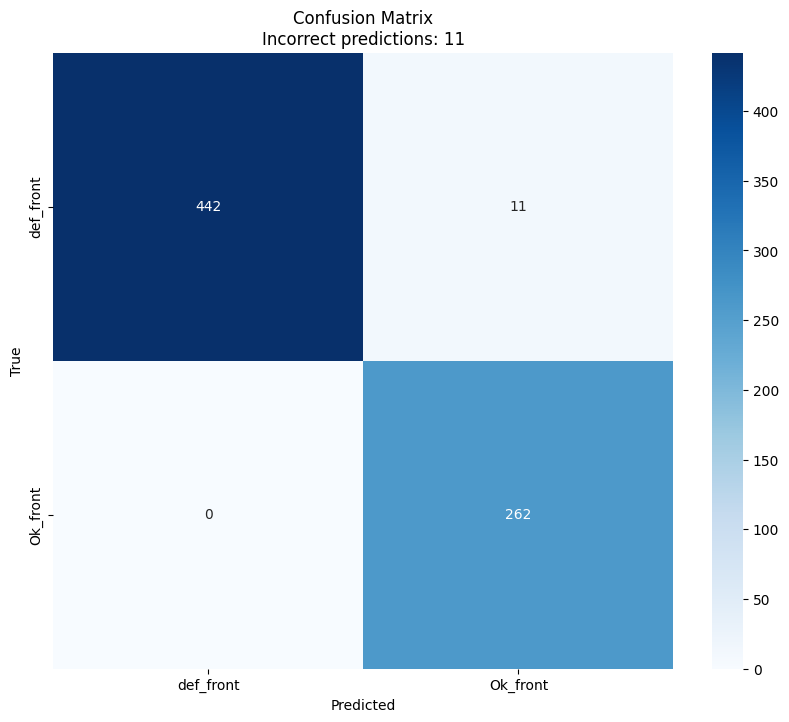

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# 재현 가능한 결과를 위해 랜덤 시드 설정
torch.manual_seed(42)
np.random.seed(42)

# 변수 초기화
num_correct = 0
num_total = 0
num_incorrect = 0

# 클래스별 정답 개수 및 맞춘 개수를 저장할 리스트 초기화
class_correct = [0] * num_classes
class_total = [0] * num_classes

# 실제 클래스와 예측된 클래스를 저장할 리스트 초기화
true_classes = []
predicted_classes = []

# 예측 수행
with torch.no_grad():
    model_ft.eval()
    for images, labels in dataloaders['test']:
        images = images.to(device)
        labels = labels.to(device)

        # 모델 예측
        outputs = model_ft(images)
        _, predicted = torch.max(outputs, 1)

        # 정확도 및 잘못 분류된 이미지 개수 계산
        num_correct += torch.sum(predicted == labels).item()
        num_total += labels.size(0)
        num_incorrect += torch.sum(predicted != labels).item()

        # 클래스별 정답 개수 및 맞춘 개수 계산
        for i in range(len(predicted)):
            label = labels[i]
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1
            
        # 실제 클래스와 예측된 클래스 저장
        true_classes.extend(labels.cpu().numpy())
        predicted_classes.extend(predicted.cpu().numpy())

# 정확도 계산
accuracy = num_correct / num_total

# 결과 출력
if num_incorrect == 0:
    print("No incorrectly classified images")
else:
    print("Number of incorrectly classified images:", num_incorrect)

print("Accuracy:", accuracy)

# 클래스별 정답 개수 및 맞춘 개수 출력
for i in range(num_classes):
    print('Accuracy of %s : %d/%d' % (classes[i], class_correct[i], class_total[i]))

# Confusion Matrix 생성
cm = confusion_matrix(true_classes, predicted_classes)

# 클래스 이름 설정
class_names = classes

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix\nIncorrect predictions: {}'.format(num_incorrect))  # 잘못 예측한 이미지 수 포함
plt.show()

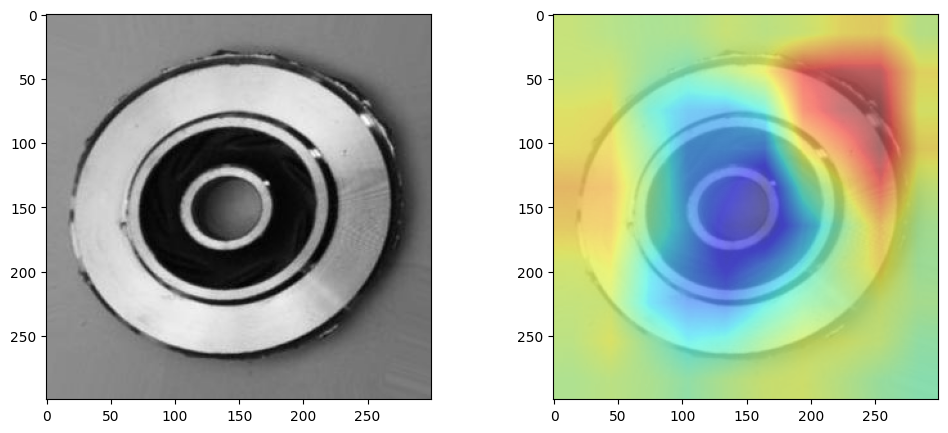

In [59]:
from captum.attr import IntegratedGradients, GuidedGradCam, LayerGradCam, LayerDeepLift
# from captum.attr.visualization import visualize_image_attr
from torchvision.io import read_image
from PIL import Image
import cv2

net = model_ft
guided_gc = LayerGradCam(net, net.layer4)

foldername = os.path.join(data_dir, 'test/' + class_names[0])
imagename = np.random.choice(os.listdir(foldername), 1)[0]

img = Image.open(os.path.join(foldername, imagename))
im = np.asarray(img)

img = data_transforms['test'](img)

input = img.reshape((1,)+img.shape)
input = input.to(device)
input.requires_grad = True


# Computes guided GradCAM attributions for class 3.
# attribution size matches input size, Nx3x32x32
attribution = guided_gc.attribute(input, target=0)


grid = attribution.cpu().detach().numpy()[0,:,:,:].transpose((1,2,0))
grid = 255 * ( (grid -  grid.min()) / (grid.max() -  grid.min()) )
grid = grid.astype(np.uint8)
grid = cv2.resize(grid, (300, 300), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.imshow(im)

plt.subplot(1,2,2)
plt.imshow(im, alpha=0.5)
plt.imshow(grid, alpha=0.5, cmap='jet')
plt.show()

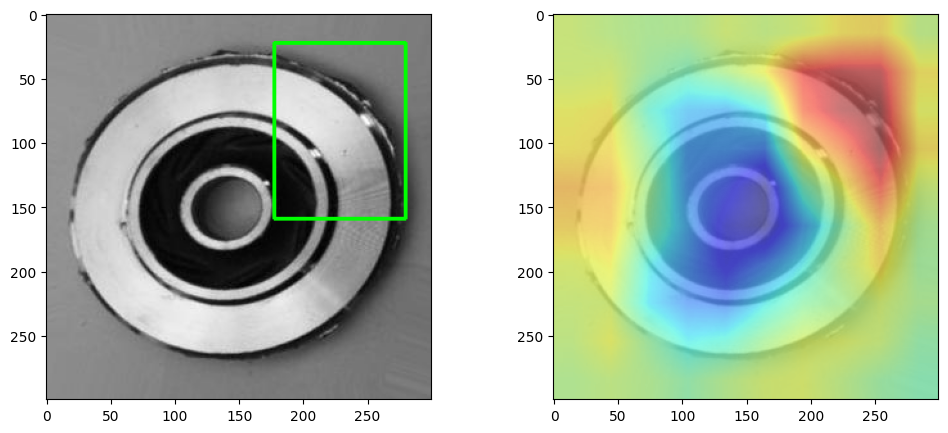

In [7]:
threshold = 190 # 임계값 설정

# threshold 이상의 값을 가지는 영역을 구합니다.
thresholded_grid = np.where(grid > threshold, grid, 0)

# threshold 이상의 값을 가지는 영역을 bounding box로 표시합니다.
contours, _ = cv2.findContours(thresholded_grid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 이미지를 복사하여 수정 가능한 형태로 만듭니다.
im_copy = im.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(im_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(im_copy)

plt.subplot(1, 2, 2)
plt.imshow(im, alpha=0.5)
plt.imshow(grid, alpha=0.5, cmap='jet')
plt.show()

In [7]:
CAM_images = []
# true_classes와 predicted_classes에서 라벨 값이 1로 같은 이미지의 인덱스 찾기
same_label_indices = [i for i, (true_label, predicted_label) in enumerate(zip(true_classes, predicted_classes)) if true_label == 0 and predicted_label == 0]

# same_label_indices에 해당하는 이미지를 전부 불러와서 CAM_images에 저장
for idx in same_label_indices:
    image, _ = dataloaders['test'].dataset[idx]
    file_path = dataloaders['test'].dataset.imgs[idx][0]  # 파일 경로는 test_loader.dataset.imgs에 저장되어 있음
    CAM_images.append((image, file_path))

# CAM_images 리스트에 저장된 이미지의 개수 출력
print("Number of images in CAM_images:", len(CAM_images))

Number of images in CAM_images: 442


In [45]:
n = 90

Selected image path: C:\Users\noname\Desktop\Casting\casting_data\test\def_front\cast_def_0_1633.jpeg


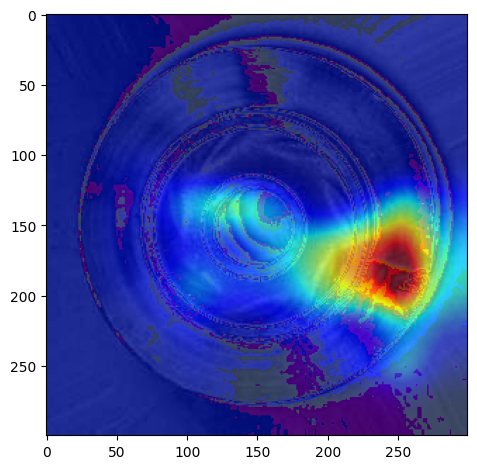

In [46]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import GradCAM


# 이미지 파일 경로 가져오기
image_path = os.path.join(foldername, CAM_images[n][1])
selected_image_path = CAM_images[n][1]

print("Selected image path:", selected_image_path)

# 이미지 읽어오기
img_pil = Image.open(image_path)

# ToTensor 변환 적용
img = data_transforms['test'](img_pil)
input = img.unsqueeze(0)  # 배치 차원 추가
input = input.to(device)
input.requires_grad = True

with GradCAM(model_ft) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model_ft(input)
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

#Kernel Dead 방지 코드
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#CAM을 원본 이미지에 덮어씌우기
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.3)
#CAM 히트맵 출력
plt.imshow(result, cmap='jet')
plt.tight_layout()
plt.show()

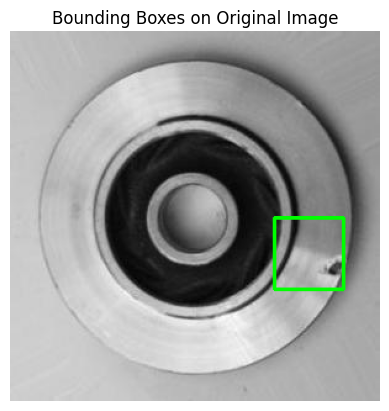

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision.transforms.functional import to_pil_image
from PIL import ImageDraw

# 이미지 파일을 읽어옵니다.
img3 = cv2.imread(selected_image_path)

# CAM의 히트맵 사이즈를 이미지와 같게 조정
cam_resized = cv2.resize(activation_map[0].squeeze(0).cpu().detach().numpy(), (img3.shape[1], img3.shape[0]))

# 임계값 이상을 가진 영역만 활성화하여 binary_map에 할당
threshold = 0.8  # you may need to adjust this threshold based on your activation map
binary_map = cam_resized > threshold

# binary map의 contour 찾기
contours, _ = cv2.findContours(np.uint8(binary_map), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지에 바운딩 박스 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img3, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green color, thickness: 2

# 바운딩 박스가 그려진 이미지 출력
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes on Original Image')
plt.axis('off')
plt.show()

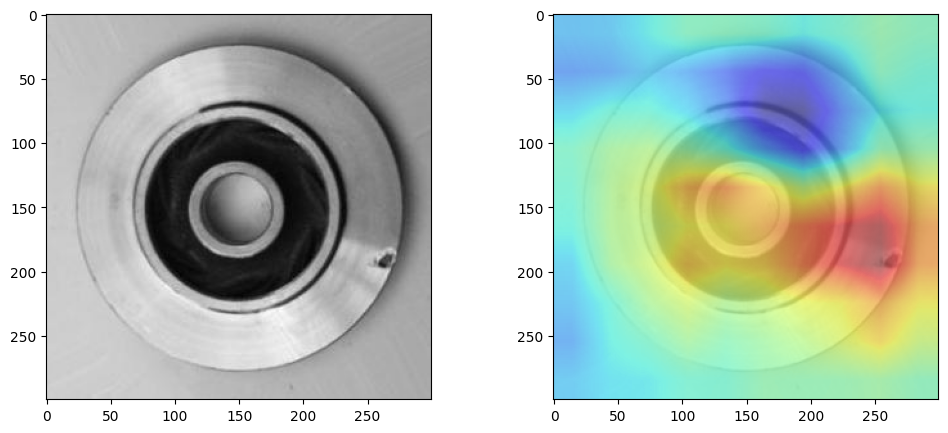

In [48]:
from PIL import Image
from captum.attr import IntegratedGradients, GuidedGradCam, LayerGradCam, LayerDeepLift

net = model_ft
guided_gc = LayerGradCam(net, net.layer4)

foldername = os.path.join(data_dir, 'test/', class_names[0])

# 이미지 파일 경로 가져오기
image_path = os.path.join(foldername, CAM_images[n][1])

# 이미지 읽어오기
img_pil = Image.open(image_path)

# ToTensor 변환 적용
img = data_transforms['test'](img_pil)

input = img.reshape((1,) + img.shape)
input = input.to(device)
input.requires_grad = True

attribution = guided_gc.attribute(input, target=0)

grid = attribution.cpu().detach().numpy()[0,:,:,:].transpose((1,2,0))
grid = 255 * ((grid - grid.min()) / (grid.max() - grid.min()))
grid = grid.astype(np.uint8)
grid = cv2.resize(grid, (300, 300), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.imshow(img_pil)

plt.subplot(1,2,2)
plt.imshow(img_pil, alpha=0.5)
plt.imshow(grid, alpha=0.5, cmap='jet')
plt.show()

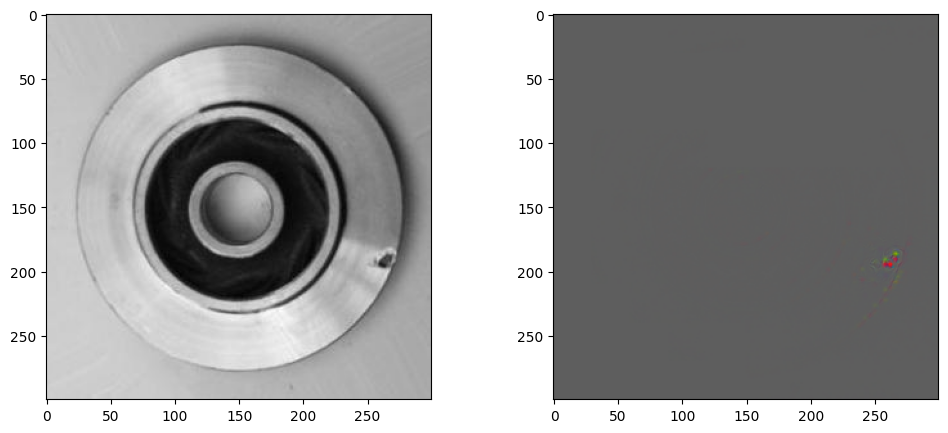

In [49]:
from PIL import Image
from captum.attr import IntegratedGradients, GuidedGradCam, LayerDeepLift

net = model_ft
guided_gc = GuidedGradCam(net, net.layer4)

foldername = os.path.join(data_dir, 'test/', class_names[0])

# 이미지 파일 경로 가져오기
image_path = os.path.join(foldername, CAM_images[n][1])

# 이미지 읽어오기
img_pil = Image.open(image_path)

# ToTensor 변환 적용
img = data_transforms['test'](img_pil)

input = img.reshape((1,) + img.shape)
input = input.to(device)
input.requires_grad = True

attribution = guided_gc.attribute(input, target=0)

grid = attribution.cpu().detach().numpy()[0,:,:,:].transpose((1,2,0))
grid = 255 * ((grid - grid.min()) / (grid.max() - grid.min()))
grid = grid.astype(np.uint8)
grid = cv2.resize(grid, (300, 300), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.imshow(img_pil)

plt.subplot(1,2,2)
plt.imshow(grid, alpha=1, cmap='jet')
plt.show()